## Exploring Airbnb Prices in New York City

#### By Jit Sarbadhikari [ Data Analyst ]

### Introduction

This winter, we're planning to take a trip to New York City! Everyone knows the cost of living there is sky-high, so naturally, we wanted to see if there was a way to find bargains. One popular option: Airbnb!

Airbnb is a shared economy platform for people to offer their own housing for travellers. Since 2008, it has grown in popularity and has become ubiquitous in travelling options, becoming a large competitor in the hotel industry. Competing with hotels and other Airbnbs makes pricing challenging for sellers. There are many features that can factor into the price - its proximity to popular locations, amenities, size, etc.

In this project, we are aiming to see if there are certain features that contribute to price more than others. We also want to see if we can find outliers for the Airbnbs (bargains or ripoffs). We hope that this exploration can be useful for travelers looking to find a place in New York City, or for homeowners to be able to price their property at a competitive price to make a profit.

##### We'll be using Python 3 and its standard libraries for this project :

In [3]:
# Lets import the required libraries..

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### 1. To start, let's import our dataset store it in a variable & take a look at what the our data looks like.

In [4]:
air_bnb = pd.read_csv('AB_NYC_2019.csv')
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
# Lets check out the overall information of the data..

air_bnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [12]:
# Lets see the number of rows & columns of the data set..

air_bnb.shape

print('There are total:',air_bnb.shape[0],'rows.')
print('There are total:',air_bnb.shape[1],'columns.')

There are total: 48895 rows.
There are total: 16 columns.


In [16]:
# Lets check the column names of the data set..

air_bnb.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [23]:
# Lets check the Neighbourhood Group 7 Room type

print('Neighbour_hood:', air_bnb['neighbourhood_group'].unique().tolist())

print('Room Type:', air_bnb['room_type'].unique().tolist())


Neighbour_hood: ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
Room Type: ['Private room', 'Entire home/apt', 'Shared room']


In [25]:
# Lets check out the descriptive stats..

air_bnb.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


- We are going to be working with Airbnbs in the five boroughs in New York City. There are three types of rooms: shared rooms, private rooms, or the entire home or apartment. We can expect the rooms to have a significant impact on the price, as people would prefer to have an entire home to themselves rather than a shared room, so homeowners will likely charge more. We will explore this later.

In [31]:
# Lets look out for any null values in the data set..

air_bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [33]:
# let's proceed with removing columns that are not important and handling of missing data.

air_bnb.drop(['id','host_name','last_review'],axis=1,inplace=True)

In [34]:
air_bnb.isnull().sum()

name                                 16
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [35]:
# replace all NaN values in 'reviews_per_month' with 0

air_bnb.fillna({'reviews_per_month':0},inplace=True)

In [36]:
# checking changes
air_bnb['reviews_per_month'].isnull().sum()

0

##### Now we are ready for an exploration of our data..

In [41]:
# let's see which host (IDs) have the most listings on Airbnb platform and taking advantage of this service.Get top 10 host..

top_10 = air_bnb['host_id'].value_counts()
top_10.head(10)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [44]:
# top host check
top_host=air_bnb['calculated_host_listings_count'].max()
top_host

327

In [47]:
top_host_df=pd.DataFrame(top_10).head(10)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'Host_ID', 'host_id':'P_Count'}, inplace=True)
top_host_df

,Host_ID,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


[Text(0, 0, '7503643'),
 Text(1, 0, '12243051'),
 Text(2, 0, '16098958'),
 Text(3, 0, '22541573'),
 Text(4, 0, '30283594'),
 Text(5, 0, '61391963'),
 Text(6, 0, '107434423'),
 Text(7, 0, '137358866'),
 Text(8, 0, '200380610'),
 Text(9, 0, '219517861')]

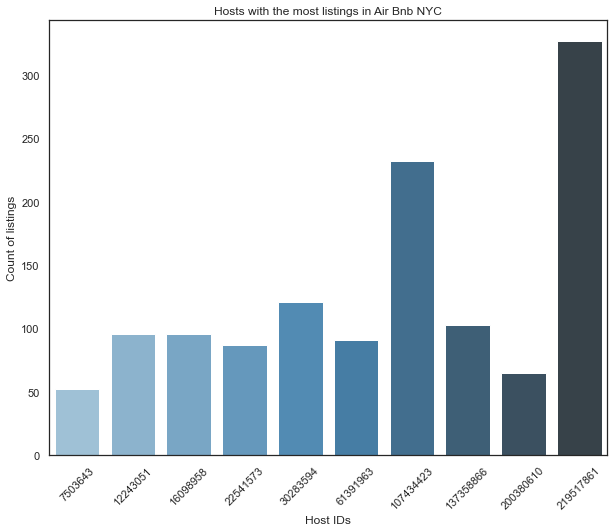

In [49]:
viz_1=sns.barplot(x="Host_ID", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in Air Bnb NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)

In [50]:
# How about price? Let's see what our typically Airbnb is priced at, as well as what the outliers look like.

print(air_bnb['price'].describe(percentiles=[.25, .50, .75, .95]))

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
95%        355.000000
max      10000.000000
Name: price, dtype: float64


#### We find that there are some very large outliers, so for visualization purposes, we winsorize (ignore) the top 5% of data, about $400.

##### Now that we have seen the data that we are working with, let's visualize our data in order to get a better understanding of it.

- We'll start by looking at some geographical data:

- what boroughs have the most rooms?
- what is the price distribution of rooms per borough?
- what is the frequency and price distribution of rooms per room type?

###### Neighbourhood Groups
First we'll look at the neighbourhood groups, and where Airbnbs are most commonly found. We'll also look at how they are priced in each neighbourhood group. Using seaborn, we can make some nice visuals!

C:\Users\hello\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


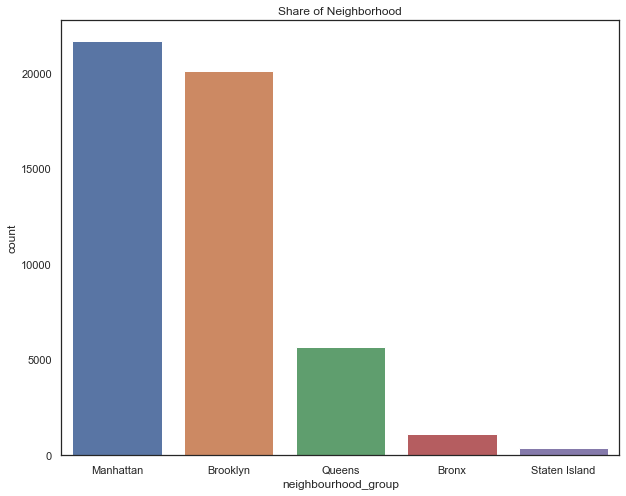

In [52]:
ax = sns.countplot('neighbourhood_group',data=air_bnb,order=air_bnb['neighbourhood_group'].value_counts().index)
ax.set_title('Share of Neighborhood')
plt.show();

##### Manhattan and Brooklyn have the highest number of listings, at around 20K each. This can be attributed to the fact that both of those neighbourhoods have more of the tourist attractions, so people would typically want to stay close to what they are seeing.

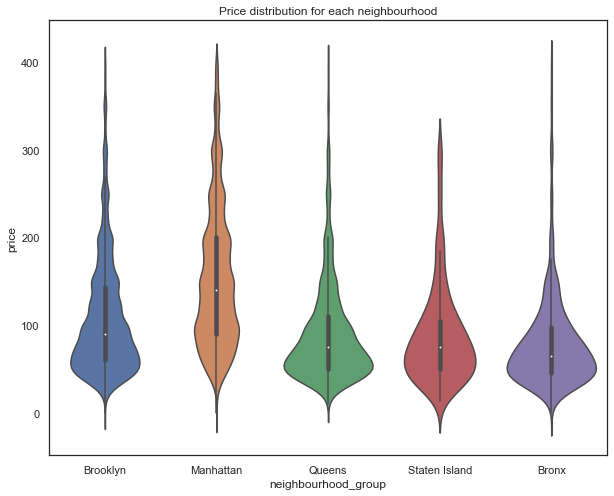

In [53]:
winsorized_df=air_bnb[air_bnb.price < 400]

# using violinplot to showcase density and distribtuion of prices 
viz_2=sns.violinplot(data=winsorized_df, x='neighbourhood_group', y='price')
viz_2.set_title('Price distribution for each neighbourhood')
plt.show()

#### Now that we've looked at the locations for the Airbnbs, let's explore the room types and how the price distribution differs between them.

C:\Users\hello\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


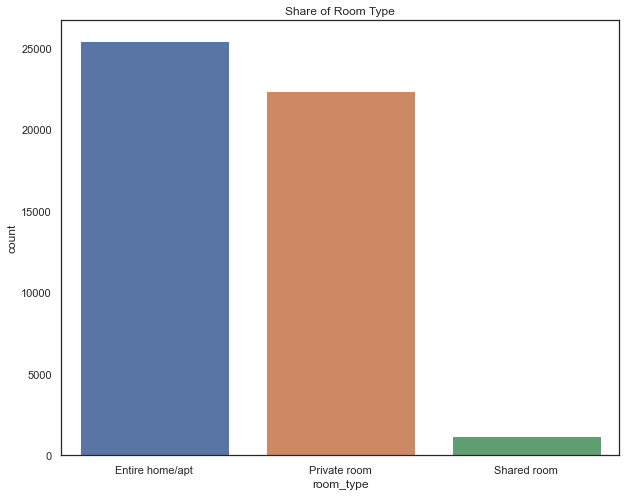

In [54]:
ax = sns.countplot('room_type',data=air_bnb,order=air_bnb['room_type'].value_counts().index)
ax.set_title('Share of Room Type')
plt.show()

In [55]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
air_bnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [56]:
#last column we need to look at is 'number_of_reviews'

#let's grab 10 most reviewed listings in NYC
top_reviewed_listings=air_bnb.nlargest(10,'number_of_reviews')
top_reviewed_listings

,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
11759,Room near JFK Queen Bed,47621202,Queens,Jamaica,40.66730,-73.76831,Private room,47,1,629,14.58,2,333
2031,Great Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82085,-73.94025,Private room,49,1,607,7.75,3,293
2030,Beautiful Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82124,-73.93838,Private room,49,1,597,7.72,3,342
2015,Private Bedroom in Manhattan,4734398,Manhattan,Harlem,40.82264,-73.94041,Private room,49,1,594,7.57,3,339
13495,Room Near JFK Twin Beds,47621202,Queens,Jamaica,40.66939,-73.76975,Private room,47,1,576,13.40,2,173
10623,Steps away from Laguardia airport,37312959,Queens,East Elmhurst,40.77006,-73.87683,Private room,46,1,543,11.59,5,163
1879,Manhattan Lux Loft.Like.Love.Lots.Look !,2369681,Manhattan,Lower East Side,40.71921,-73.99116,Private room,99,2,540,6.95,1,179
20403,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,16.22,5,341
4870,Private brownstone studio Brooklyn,12949460,Brooklyn,Park Slope,40.67926,-73.97711,Entire home/apt,160,1,488,8.14,1,269
471,LG Private Room/Family Friendly,792159,Brooklyn,Bushwick,40.70283,-73.92131,Private room,60,3,480,6.70,1,0


In [58]:
price_avrg=top_reviewed_listings.price.mean()
print('Average price per night is {}'.format(price_avrg))

Average price per night is 65.4


##### There is no reason to visualize this as table format would be the most suitable output for better reading. From this table output, we can observe that top 10 most reviewed listings on Airbnb for NYC has price average of $65 with most of the listings under \$50, and 9/10 of them are 'Private room' type; top reviewed listing has 629 reviews.

. Summarizing our findings, suggesting other features

- This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings. Further, we came back to the first column with name strings and had to do a bit more coding to parse each title and analyze existing trends on how listings are named as well as what was the count for the most used words by hosts. Lastly, we found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb Data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new features and much more. Therefore, I hope this kernel helps everyone!